##  <div style="text-align:center">Distribution fitting, parameter estimation with confidence interval and Hypothesis testing <br> <br> for flood data of four different sites using python

### Executive Summary-

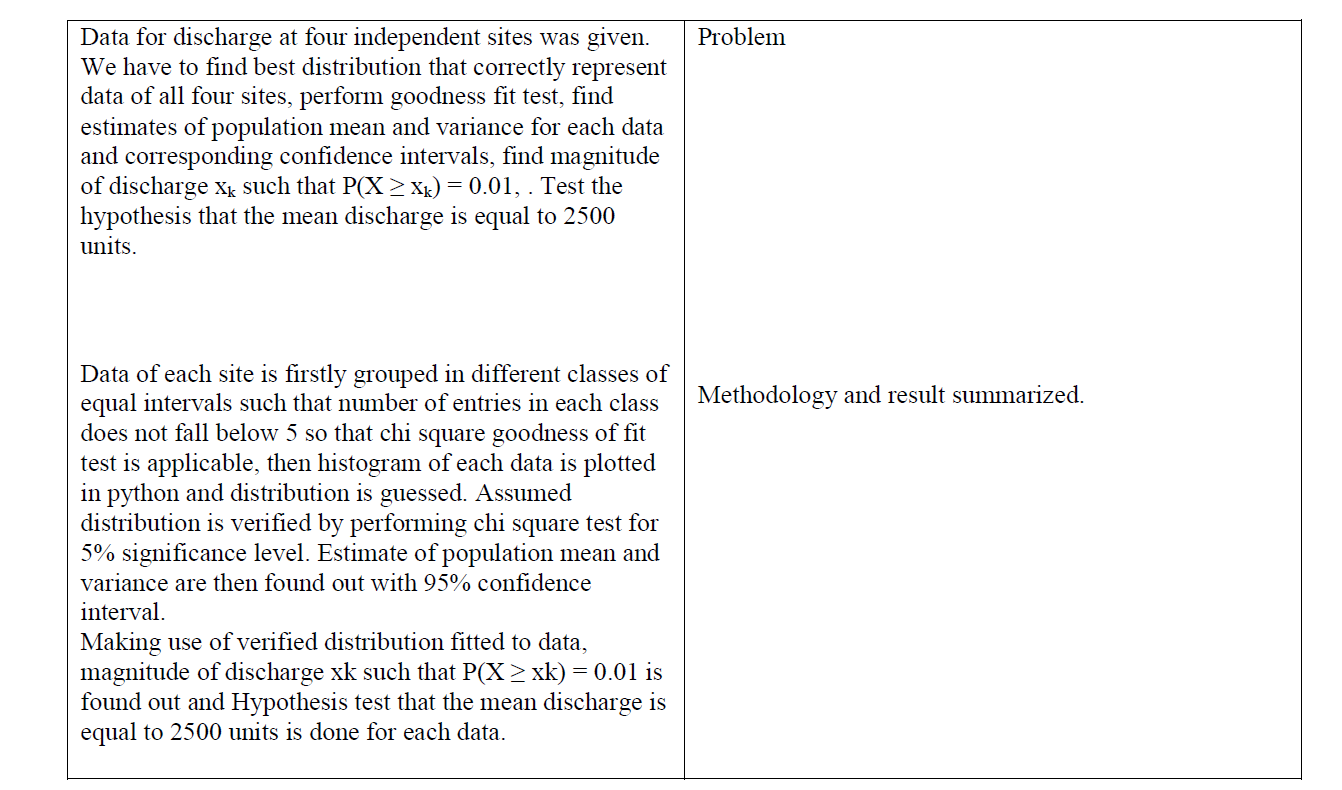

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel('Probexel.xlsx')
df.drop(df.columns[[4, 5, 6, 7]], axis = 1, inplace = True)
df.head()

,Data1,Data2,Data3,Data4
0,2229.31,1914.24,2026.96,186.19
1,2170.04,2089.11,2052.21,1246.70
2,2557.43,2653.39,2311.20,19125.62
3,2759.92,1479.94,2347.64,192.17
4,1262.45,1515.81,3650.84,340.81


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Data1    100 non-null float64
Data2    100 non-null float64
Data3    100 non-null float64
Data4    100 non-null float64
dtypes: float64(4)
memory usage: 3.2 KB


### Distribution fitting for data:

### Chi square goodness of fit test for Log-normal distibution for each data:

## Data 1:

In [3]:
import scipy as sp
from scipy import stats

In [ ]:
samp = np.loadtxt('20103107.txt', usecols=0)
Mymean=samp.mean()
Mystd=samp.std(ddof=1)

In [ ]:
nbins=5
counts, edges, plot = plt.hist(samp,bins=nbins,alpha=0.4)

In [ ]:
edges2= edges
edges2[0]=-float('inf')
edges2[-1]=float('inf')


In [ ]:
summ = 0
for i in range(0,nbins):
    upper_cdf = stats.norm.cdf(edges2[i+1], loc=Mymean, scale=Mystd)
    lower_cdf = stats.norm.cdf(edges2[i],  loc=Mymean, scale=Mystd)
    summ += (counts[i]**2/(100*(upper_cdf-lower_cdf)))
chi_statistic = summ - 100
chi_statistic

In [ ]:
exp_counts = np.array([])
for i in range(0,nbins):
    upper_cdf = stats.norm.cdf(edges2[i+1], loc=Mymean, scale=Mystd)
    lower_cdf = stats.norm.cdf(edges2[i],  loc=Mymean, scale=Mystd)
    exp_counts = np.append(exp_counts, 100 * (upper_cdf - lower_cdf))
print(stats.chisquare(counts,exp_counts,ddof=2))

In [ ]:
edges2_ = [ round(elem, 2) for elem in edges2 ]
edges_modified=[]
edges_modified.append(f'<{edges2_[1]}')
for i in range(1, len(edges2_)-1):
    edges_modified.append( f'{edges2_[i]} - {edges2_[i+1]}')
    
edges_modified[-1]=f'>{edges2_[-2]}'
edges_modified

    


In [11]:
import math

In [12]:
stats.lognorm.cdf(50,s=2,loc=3,scale=math.exp(3))

0.6646085620195824

In [ ]:
Test1= pd.DataFrame(list(zip(edges_modified, counts,exp_counts)),columns =['Interval', 'Oi', 'ei'])
Test1

### Compiling all the above individual steps, following function is defined that takes input data, number of bins in which we want that data to bin and, number of datapoints as input argument and prints chi square statistic, p value and dataframe of observed values and expected values for each bin as output.

In [16]:
def Chisquare_lognormaldist(data1,nbins,n):
    
    data=np.log(data1)
    
    Mymean=data.mean()
    Mystd=data.std(ddof=1)
    
    counts, edges, plot = plt.hist(data1,bins=nbins,alpha=0.4)
    
    edges2= edges
    edges2[0]=-float('inf')
    edges2[-1]=float('inf')
    
    summ = 0
    for i in range(0,nbins):
        upper_cdf = stats.lognorm.cdf(edges2[i+1],s=Mystd, loc=Mymean, scale=math.exp(Mymean))
        lower_cdf = stats.lognorm.cdf(edges2[i],  s=Mystd, loc=Mymean, scale=math.exp(Mymean))
        summ += (counts[i]**2/(n*(upper_cdf-lower_cdf)))
    chi_statistic = summ - n
    print('Chi statistics calculated manually: {}'.format(chi_statistic))
    
    exp_counts = np.array([])
    for i in range(0,nbins):
        upper_cdf = stats.lognorm.cdf(edges2[i+1],s=Mystd, loc=Mymean, scale=math.exp(Mymean))
        lower_cdf = stats.lognorm.cdf(edges2[i], s=Mystd, loc=Mymean, scale=math.exp(Mymean))
        exp_counts = np.append(exp_counts, n *(upper_cdf - lower_cdf))
    print(stats.chisquare(counts,exp_counts,ddof=2))
    
    edges2_ = [ round(elem, 2) for elem in edges2 ]
    edges_modified=[]
    edges_modified.append(f'<{edges2_[1]}')
    for i in range(1, len(edges2_)-1):
        edges_modified.append( f'{edges2_[i]} - {edges2_[i+1]}')
    
    edges_modified[-1]=f'>{edges2_[-2]}'
    
    Test1= pd.DataFrame(list(zip(edges_modified, counts,exp_counts)),columns =['Interval', 'Oi', 'ei'])
    
    return Test1
    
    
    
    
    
    
    
    
    

### Test results for data 1:

In [17]:
samp = np.loadtxt('20103107.txt', usecols=0)

Chi statistics calculated manually: 15.78508914010996
Power_divergenceResult(statistic=15.785089140109953, pvalue=0.0003735179222061351)


,Interval,Oi,ei
0,<1131.66,7.0,5.629419
1,1131.66 - 1886.57,15.0,27.794990
2,1886.57 - 2641.49,35.0,29.628735
3,2641.49 - 3396.4,30.0,18.579860
4,>3396.4,13.0,18.366997


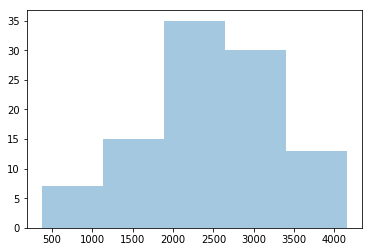

In [18]:
Chisquare_lognormaldist(samp,5,100)

Therefore P value for data 1 is less than 5% hence we cannot reject hypothesis that data follow normal distribution.

In [ ]:
def Chisquare_normaldist2(data,nbins,n):
    
    Mymean=data.mean()
    Mystd=data.std(ddof=1)
    
    param = stats.norm.fit(samp) # distribution fitting
    
    
    counts, edges, plot = plt.hist(samp,bins=nbins,alpha=0.4)
    
    edges2= edges
    edges2[0]=-float('inf')
    edges2[-1]=float('inf')
    
    summ = 0
    for i in range(0,nbins):
        upper_cdf = stats.norm.cdf(edges2[i+1], *param)
        lower_cdf = stats.norm.cdf(edges2[i],  *param)
        summ += (counts[i]**2/(n*(upper_cdf-lower_cdf)))
    chi_statistic = summ - n
    print('Chi statistics calculated manually: {}'.format(chi_statistic))
    
    exp_counts = np.array([])
    for i in range(0,nbins):
        upper_cdf = stats.norm.cdf(edges2[i+1], *param)
        lower_cdf = stats.norm.cdf(edges2[i],  *param)
        exp_counts = np.append(exp_counts, n *(upper_cdf - lower_cdf))
    print(stats.chisquare(counts,exp_counts,ddof=2))
    
    edges2_ = [ round(elem, 2) for elem in edges2 ]
    edges_modified=[]
    edges_modified.append(f'<{edges2_[1]}')
    for i in range(1, len(edges2_)-1):
        edges_modified.append( f'{edges2_[i]} - {edges2_[i+1]}')
    
    edges_modified[-1]=f'>{edges2_[-2]}'
    
    Test1= pd.DataFrame(list(zip(edges_modified, counts,exp_counts)),columns =['Interval', 'Oi', 'ei'])
    
    return Test1

## Data 2:

In [19]:
samp2 = np.loadtxt('20103107.txt', usecols=1)


### Test results for data 2:

Chi statistics calculated manually: 1.9989451557738676
Power_divergenceResult(statistic=1.9989451557738676, pvalue=0.36807352009991884)


,Interval,Oi,ei
0,<1798.34,26.0,24.845897
1,1798.34 - 2831.66,41.0,44.833097
2,2831.66 - 3864.99,24.0,21.191290
3,3864.99 - 4898.31,5.0,6.601522
4,>4898.31,4.0,2.528194


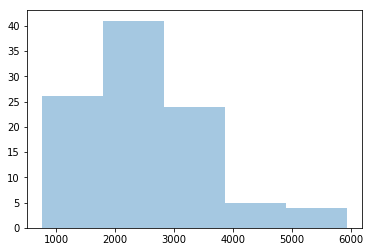

In [20]:
Chisquare_lognormaldist(samp2,5,100)

Therefore P value for data 1 is greater than 5% hence we cant reject hypothesis that data follow lognormal distribution.

## Data 3:

In [21]:
samp3 = np.loadtxt('20103107.txt', usecols=2)

Chi statistics calculated manually: 3.14092498656818
Power_divergenceResult(statistic=3.140924986568175, pvalue=0.37040351925764353)


,Interval,Oi,ei
0,<1664.7,18.0,19.117855
1,1664.7 - 2424.09,31.0,34.078842
2,2424.09 - 3183.48,29.0,24.770716
3,3183.48 - 3942.86,12.0,12.575448
4,3942.86 - 4702.25,8.0,5.529974
5,>4702.25,2.0,3.927165


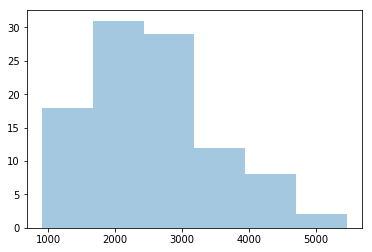

In [22]:
Chisquare_lognormaldist(samp3,6,100)

Therefore P value for data 3 is greater than 5% hence we cannot reject hypothesis that data follow lognormal distribution.

## Data 4:

In [23]:
samp4 = np.loadtxt('20103107.txt', usecols=3)

Chi statistics calculated manually: 11.460875357763612
Power_divergenceResult(statistic=11.460875357763612, pvalue=0.0032456563674420824)


,Interval,Oi,ei
0,<3832.61,73.0,76.901992
1,3832.61 - 7655.86,23.0,13.268462
2,7655.86 - 11479.12,3.0,4.529625
3,11479.12 - 15302.37,0.0,2.063533
4,>15302.37,1.0,3.236387


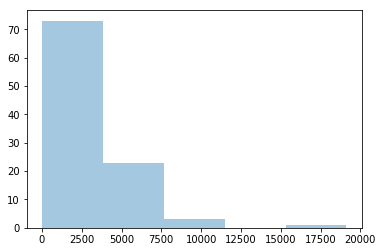

In [24]:
Chisquare_lognormaldist(samp4,5,100)

Above test shows that data 4 do not follow lognormal distribution.